# Task 1

### Import TensorFlow

In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tfc
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import cv2
from random import randint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

#### Define Methods

In [2]:
def evaluate(testSet, testLabels, testModel):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = testModel.evaluate(testSet, testLabels, verbose=2) 
    print("ACCURACY: " + str(test_acc))
    
def displaySamplesFromDataSet(xDataSet, yDataset):
    # define number of images to show
    num_row = 2
    num_col = 8
    num= num_row*num_col
    
    # get images
    images = xDataSet[0:num]
    labels = yDataset[0:num]
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes[i//num_col, i%num_col]
         ax.imshow(images[i], cmap='gray_r')
         ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    plt.show()

#### Load MNIST Dataset

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255
test_images = test_images / 255

#### Building a Training Pipeline

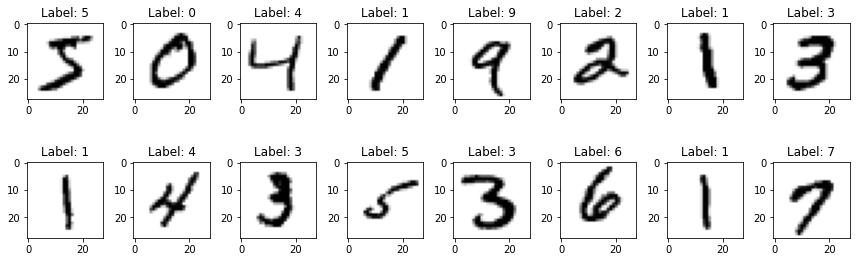

In [4]:
displaySamplesFromDataSet(train_images, train_labels)
train_images = train_images.reshape(-1, 28, 28, 1)

#### Building an Evaluation Pipeline

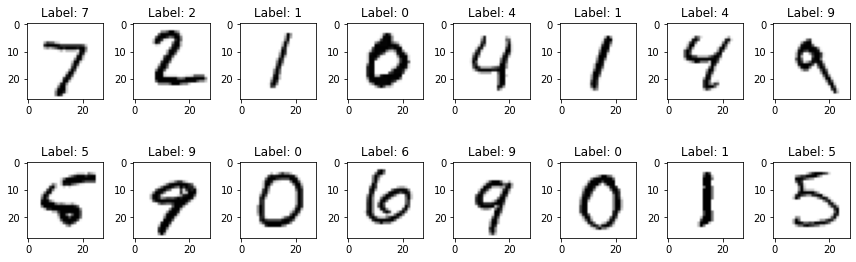

In [5]:
displaySamplesFromDataSet(test_images, test_labels)
test_images = test_images.reshape(-1, 28, 28, 1)

#### Create and Train the Model

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels),batch_size=16)

Epoch 1/5
3750/3750 [==============================] - 16s 3ms/step - loss: 0.1256 - accuracy: 0.9610 - val_loss: 0.0606 - val_accuracy: 0.9805
Epoch 2/5
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0432 - accuracy: 0.9867 - val_loss: 0.0434 - val_accuracy: 0.9877
Epoch 3/5
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0311 - accuracy: 0.9905 - val_loss: 0.0312 - val_accuracy: 0.9907
Epoch 4/5
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0364 - val_accuracy: 0.9899
Epoch 5/5
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0331 - val_accuracy: 0.9908


#### Evaluate the Model

313/313 - 1s - loss: 0.0331 - accuracy: 0.9908
ACCURACY: 0.9908000230789185


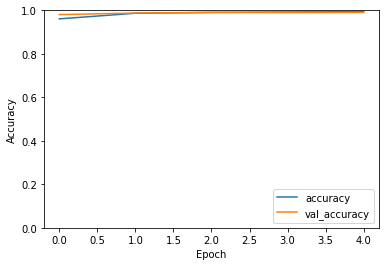

In [7]:
evaluate(test_images, test_labels, model)